In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd #for csv
import scipy.io as sio
import math

from sklearn.linear_model import LogisticRegression

# load the information in the file in a format that python can interpret
matTrainData = sio.loadmat("train.mat")
matTestData = sio.loadmat("test.mat")
#print(matData)
#print(matTrainData.items()) # 得知有哪些 items

#如何 element wise concate
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
trainDataX = np.concatenate((np.array(matTrainData["x1"]), np.array(matTrainData["x2"])), axis=1 )
print(trainDataX)
trainDataY = np.concatenate(np.array(matTrainData["y"]))
print(trainDataY)

testX = np.concatenate((np.array(matTestData["x1"]), np.array(matTestData["x2"])), axis=1 )
testY = np.concatenate(np.array(matTestData["y"]))

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
### Q1-5 ###
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#logreg = LogisticRegression(solver='lbfgs')

logreg.fit(trainDataX, trainDataY)
predictY = logreg.predict(testX)
#print(predictY)
#print(testY)
print(logreg.intercept_)
print(logreg.coef_)
logreg = LogisticRegression(C=1e4, solver='lbfgs', multi_class='multinomial')
logreg.fit(trainDataX, trainDataY)
print(logreg.intercept_)
print(logreg.coef_)
logreg = LogisticRegression(C=1e3, solver='lbfgs', multi_class='multinomial')
logreg.fit(trainDataX, trainDataY)
print(logreg.intercept_)
print(logreg.coef_)
logreg = LogisticRegression(C=1e2, solver='lbfgs', multi_class='multinomial')
logreg.fit(trainDataX, trainDataY)
print(logreg.intercept_)
print(logreg.coef_)

count = 0
print(testY)
for i in range(len(predictY)):
    if predictY[i] != testY[i]:
        count +=1
print("percentage of misclassified test samples: %d %%" % (count/len(predictY)*100))



[37.85898317]
[[-18.34633961  19.23702253]]
[26.86807291]
[[-13.44781941  14.40754423]]
[16.87549674]
[[-8.98640867 10.00480097]]
[9.3955747]
[[-5.42034585  6.32315196]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
percentage of misclassified test samples: 3 %


In [6]:
### Q1-6 ###
#P(C|x) -> P(C^x)/P(x) = h(θ) = 1/(1 + e**(-θ0 -θ1*x1 - θ2*x2) )

#initial values
θ0 = 35.0
θ1 = -15.0
θ2 = 15.0
lr = 1
iteration = 100000

θ0Lr = 0.0
θ1Lr = 0.0
θ2Lr = 0.0

θ0_history = [θ0]
θ1_history = [θ1]
θ2_history = [θ2]    

loss = 0.0

print(len(trainDataX))

#print(trainDataX)

for i in range(iteration):
    θ0Grad = 0.0
    θ1Grad = 0.0
    θ2Grad = 0.0
    loss = 0.0
    
    if i % 1000 == 0:
        print(θ0, θ1, θ2, loss)
        #print(θ0Lr, θ1Lr, θ2Lr)
    
    #計算 gradient
    for n in range(len( trainDataX)):
        x1 = trainDataX[n][0]
        x2 = trainDataX[n][1]
        
        #loss f
        loss += -(trainDataY[n]* np.log( 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)) ) + (1 - trainDataY[n])*np.log(1 - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)) ))
        
#        print(1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))
        θ0Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*1
        θ1Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*x1
        θ2Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*x2
    
    #這邊不用除，公式推倒都是 sigma，除了其實就是調整 learning rate
    #θ0Grad /= len(trainDataX)
    #θ1Grad /= len(trainDataX)
    #θ2Grad /= len(trainDataX)
    
    θ0Lr += θ0Grad ** 2
    θ1Lr += θ1Grad ** 2
    θ2Lr += θ2Grad ** 2
    
    #更新 gradient
    θ0 = θ0 - lr * θ0Grad#/np.sqrt(θ0Lr)
    θ1 = θ1 - lr * θ1Grad#/np.sqrt(θ1Lr)
    θ2 = θ2 - lr * θ2Grad#/np.sqrt(θ2Lr)
    
    # Store parameters for plotting
    θ0_history.append(θ0)
    θ1_history.append(θ1)
    θ2_history.append(θ2)
    


70
35.0 -15.0 15.0 0.0


/home/tom/anaconda3/envs/testJ/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/home/tom/anaconda3/envs/testJ/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


98.40788753260121 -433.1128282886614 737.3910337731054 0.0
98.40788753204698 -433.11282829161723 737.3910337714001 0.0
98.40788753149276 -433.1128282945731 737.3910337696948 0.0
98.40788753093854 -433.11282829752895 737.3910337679895 0.0
98.40788753038431 -433.1128283004848 737.3910337662842 0.0
98.40788752983009 -433.11282830344066 737.3910337645789 0.0
98.40788752927587 -433.1128283063965 737.3910337628736 0.0
98.40788752872164 -433.1128283093524 737.3910337611683 0.0
98.40788752816742 -433.11282831230824 737.391033759463 0.0
98.4078875276132 -433.1128283152641 737.3910337577577 0.0
98.40788752705897 -433.11282831821995 737.3910337560524 0.0
98.40788752650475 -433.1128283211758 737.3910337543471 0.0
98.40788752595053 -433.11282832413167 737.3910337526418 0.0
98.4078875253963 -433.1128283270875 737.3910337509365 0.0
98.40788752484208 -433.1128283300434 737.3910337492312 0.0
98.40788752428786 -433.11282833299924 737.3910337475259 0.0
98.40788752373363 -433.1128283359551 737.39103374582

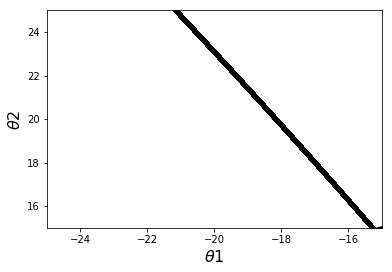

[35.410076164834564, -22.039686266473147, 26.45188844120085]
[[5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]
 [5.8 2.6]
 [5.  2.3]
 [5.6 2.7]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.1 2.5]
 [5.7 2.8]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.9999476595040926 1
0.9988575204972593 1
0.9999186336691529 1
0.9999999812321761 1
0.9999976097182124 1
0.9999999812721553 1
0.05073034658532918 1
0.9999999999054128 1
0.9999999812721553 1
0.9999999999392863 1
0.9998735133645509 1
0.9999999999392863 1
0.999999992234402 1
0.9999999297865714 1
0.9999962840656512 1
0.0010152336628450464 0
7.251610985676862e-14 0
3.153499749552124e-19 0
0.00017396166821847332 0
2.842797596036645e-09 0
4.0043943686150305e-08 0
2.848866218467803e-09 0
5.382978197356649e-11 0
8.750256578205124e-07 0
6.22524342203

NameError: name 'trainX' is not defined

In [5]:
#plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(θ1_history, θ2_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-25,-15)
plt.ylim(15,25)
plt.xlabel(r'$θ1$', fontsize=16)
plt.ylabel(r'$θ2$', fontsize=16)
plt.show()

print([θ0, θ1, θ2])

print(testX)
print(testY)
predictY = 1/(np.exp(-(testX[:, 0]*θ1 + testX[:,1]*θ2 + θ0) ) + 1)
count = 0
for i in range(len(predictY)):
    print(predictY[i], testY[i])
    if predictY[i] > 0.5 and testY[i] != 1:
        count +=1
    elif predictY[i] < 0.5 and testY[i] != 0:
        count +=1
print("percentage of misclassified test samples: %f" % (count/len(predictY)*100))

predictY = 1/(np.exp(-(trainX[:, 0]*θ1 + trainX[:,1]*θ2 + θ0) ) + 1)
count = 0
for i in range(len(predictY)):
    print(predictY[i], testY[i])
    if predictY[i] > 0.5 and testY[i] != 1:
        count +=1
    elif predictY[i] < 0.5 and testY[i] != 0:
        count +=1
print("percentage of misclassified test samples: %f" % (count/len(predictY)*100))


X = testX
Y = testY

#point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

